In [1]:
%matplotlib notebook
from BlackScholes import BlackScholes
from functools import partial
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm, rc
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd

plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex=True)

callParams = { 'K': 62, 'r': 0.06, 'volatility': 0.13 }
S_0_range = np.arange( 1, 100, 1 )
T_range   = np.arange( 0.1, 3, 0.1 )

blackScholes = partial( BlackScholes, **callParams )
greeks = {
            'Delta' : ( r"$ \Delta = \frac{\partial C}{\partial S} = N'(d^+) $",                                                  lambda s, t: blackScholes(S_0=s, T=t).delta() ),
            'Gamma' : ( r"$ \Gamma = \frac{\partial \Delta}{\partial S} = \frac{N'(d^+)}{S \sigma \sqrt{T}} $",                   lambda s, t: blackScholes(S_0=s, T=t).gamma() ),
            'Vega'  : ( r"$ v = \frac{\partial C}{\partial \sigma} = S \sqrt{T} N'(d^+) $",                                       lambda s, t: blackScholes(S_0=s, T=t).vega()  ),
            'Theta' : ( r"$ \theta = \frac{\partial C}{\partial T} = \frac{\sigma S N'(d^+)}{s \sqrt{T} } + rK e^{-rT} N(d^-) $", lambda s, t: blackScholes(S_0=s, T=t).theta() ),
            'Rho'   : ( r"$ \rho = \frac{\partial C}{\partial r} = TK e^{-rT} N(d^-) $",                                          lambda s, t: blackScholes(S_0=s, T=t).rho()   ),
         }

def plot( name, title, f ):

    X, Y = np.meshgrid(S_0_range, T_range)
    Z = np.array( [ [ f(s, t) for s in S_0_range ] for t in T_range ])

    fig = plt.figure(figsize=(8,6), facecolor='w', edgecolor='k')
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title(title, fontsize=30, color='gray')
    ax.set_xlabel('Asset price')
    ax.set_ylabel('Expiry')
    ax.set_zlabel(name)

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


<IPython.core.display.Javascript object>


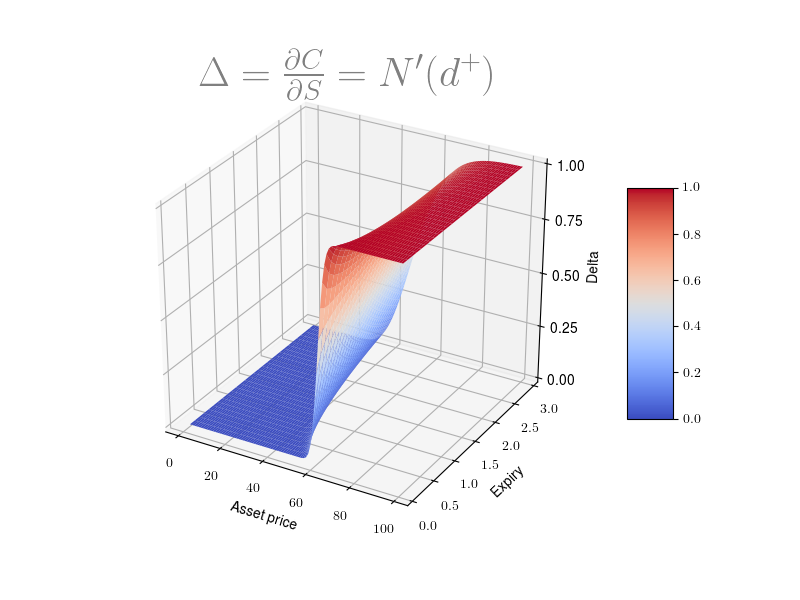

In [2]:
plot( 'Delta', *greeks['Delta'] )

<IPython.core.display.Javascript object>


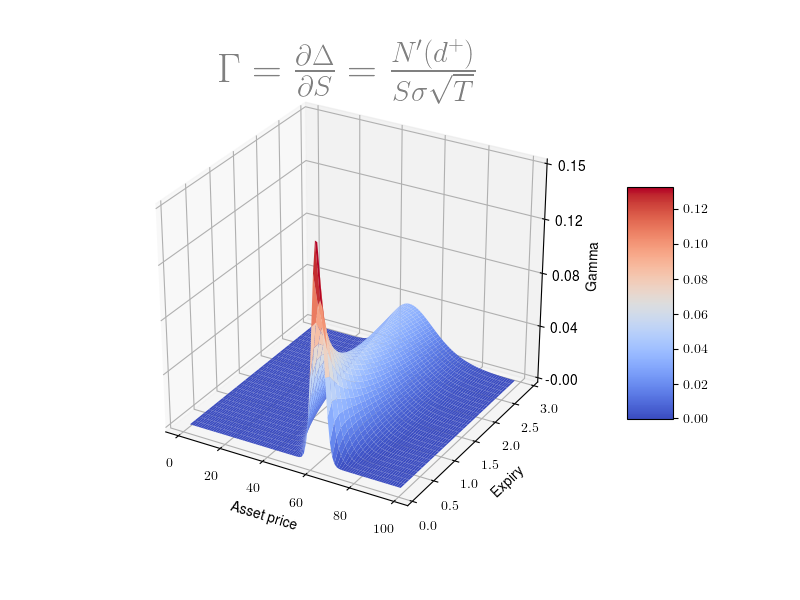

In [3]:
plot( 'Gamma', *greeks['Gamma'] )

<IPython.core.display.Javascript object>


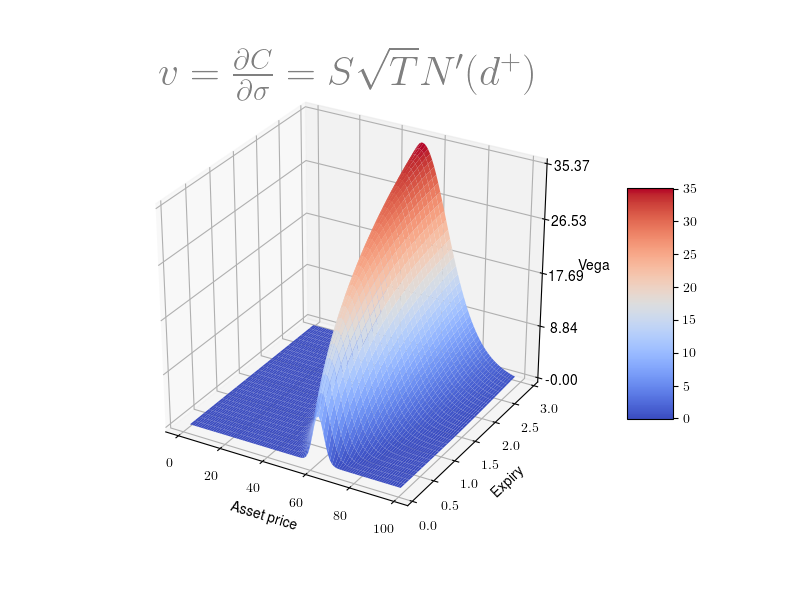

In [4]:
plot( 'Vega', *greeks['Vega'] )

<IPython.core.display.Javascript object>


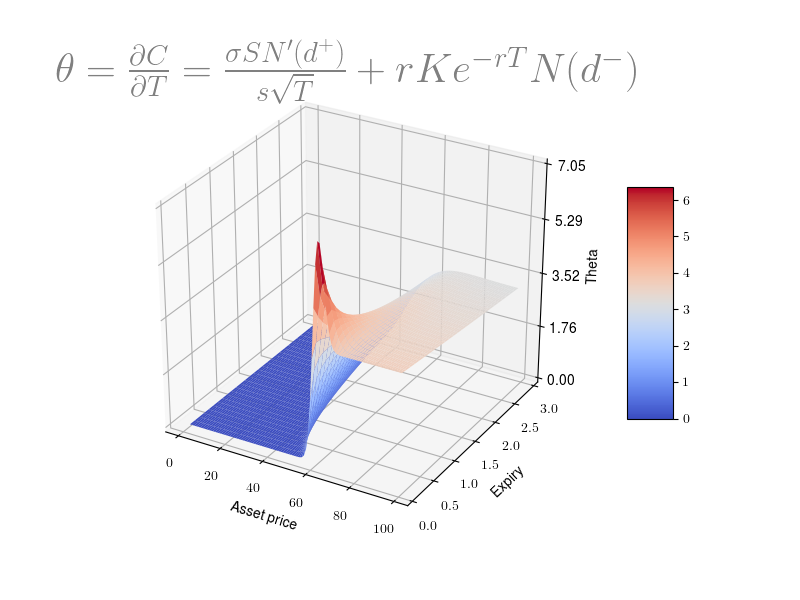

In [5]:
plot( 'Theta', *greeks['Theta'] )

<IPython.core.display.Javascript object>


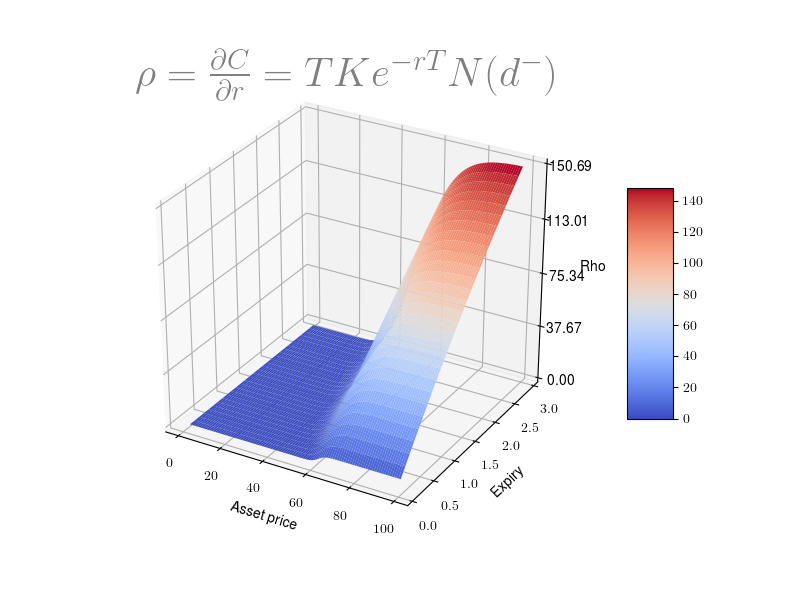

In [6]:
plot( 'Rho', *greeks['Rho'] )